# Variance of independent samples

For independent samples, where an observable $A$ is measured at each timestep $i$, the variances should be on average equally distributed.
This means, when we have a total of $n$ steps, and block them into blocks of size $m$, then we can take the variance of the individual blocks, $A^{(m)}$. These should scale as

$$
\mathrm{Var}(A^{(m)}) = \frac{1}{m} \mathrm{Var}(A)
$$

We try to demonstrate this by just taking samples from a Gaussian distribution.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
n = 1000000

m = 10

A = np.random.normal(0,1,size=(n))

Am = np.reshape(A, (-1,m))

Am_average = Am.mean(axis=1)

print(np.var(Am_average)*m)

1.0032878691372946


In [6]:
from functools import reduce

def factors(n):
    '''Finds the factors of a number'''
    return np.array(reduce(
        list.__add__,
        ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

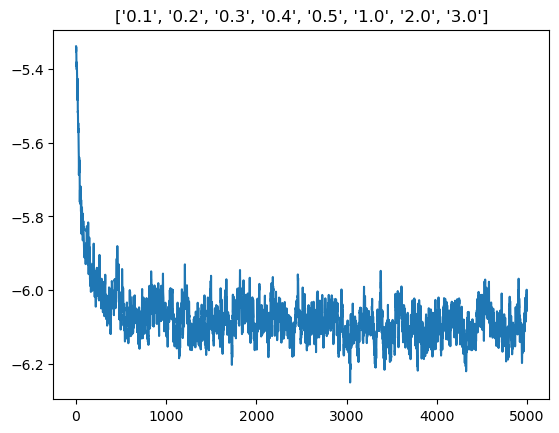

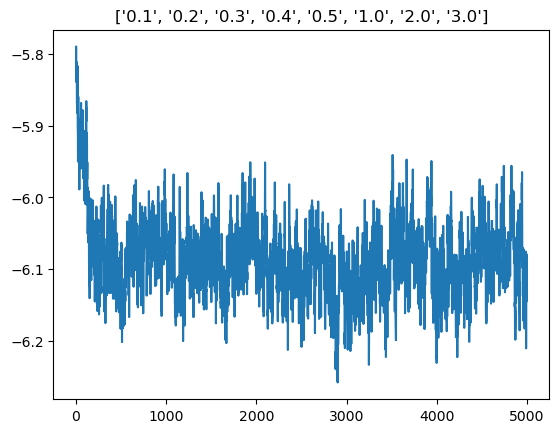

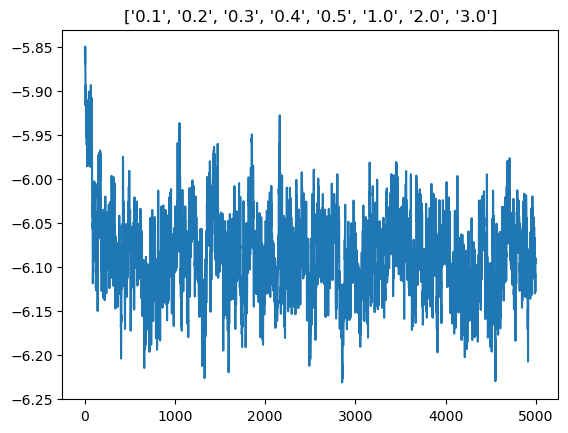

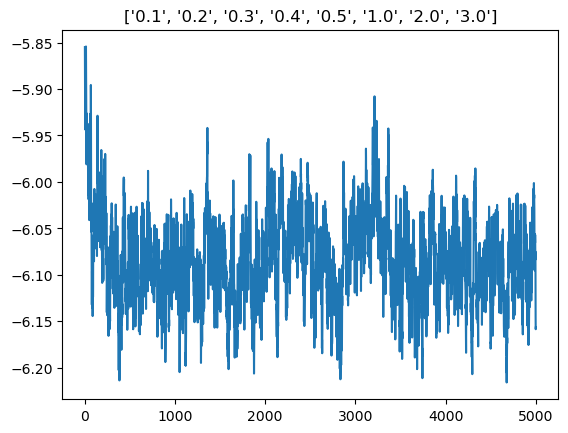

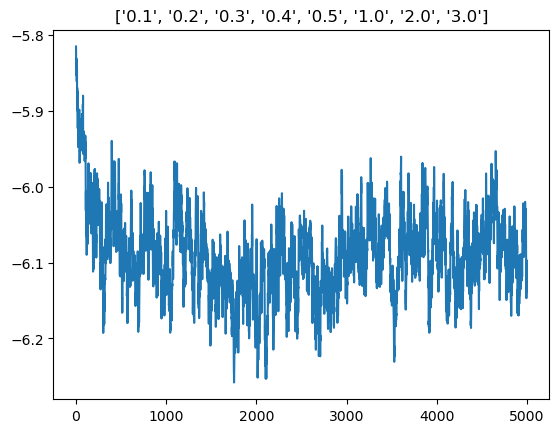

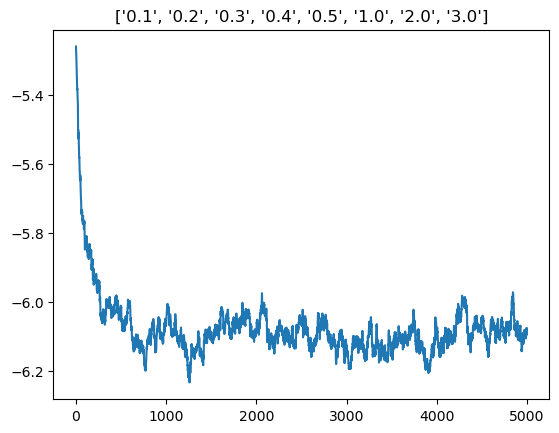

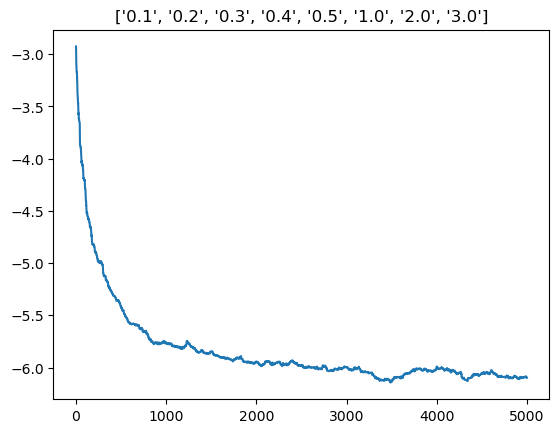

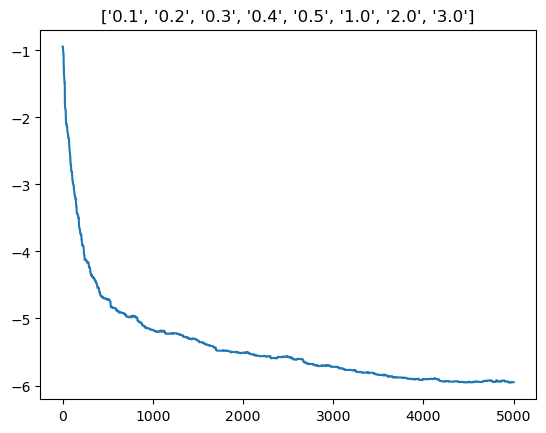

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


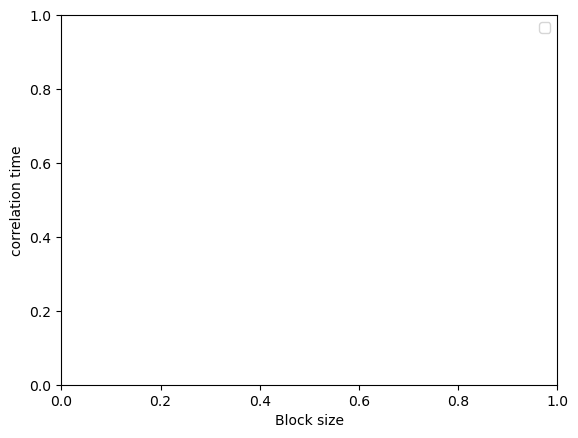

Variance of U = 5.11e-01
Var correlated = 6.90e-01


In [ ]:

def calculate_correlation_time(variable):
    n = len(variable)

    m = np.arange(20,n//5,20)

    correlation_time = np.zeros(m.shape)
    var = np.var(variable)

    for j, mm in enumerate(m):
        
        # Trim the variable so you can do calculations
        length = n - n % mm
        variable_ = variable.copy()[:length]
        #print(len(variable)-mm)

        Am = np.reshape(variable_, (-1,mm))
        Am_average = Am.mean(axis=1)
        correlation_time[j] = np.var(Am_average)*mm/var/2
    return m, correlation_time


a = [str(0.05*i)[:3] for i in range(2,11)]
#a = ['0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '2.0', '3.0']

for i in a:
    t, _, U, p = np.loadtxt(f"{i}/log.dat", unpack=True)
    
    plt.plot(t,U)
    plt.title(a)
    plt.show()

    mU, corrU = calculate_correlation_time(U)
    mP, corrP = calculate_correlation_time(p)
    
    #plt.plot(mU,corrU, '-', label = f'U_{i}')
    #plt.show()
    #plt.plot(mP,corrP, '-', label = f'P_{i}', color = i)


plt.xlabel('Block size')
plt.ylabel('correlation time')
plt.legend()

plt.show()

correlation_Time = np.mean(corrU[mU > 300][mU[mU>300]<700])

variance_U = np.var(U)

var_correlated = 2*correlation_Time*variance_U/300

print(f'Variance of U = {variance_U:.2e}')
print(f'Var correlated = {var_correlated:.2e}')

